In [24]:
import argparse
#import gym
import numpy as np
from itertools import count
from collections import namedtuple
import os 

import torch
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable
import torchvision.transforms as T
#import cv2
import pickle
import glob
import time
import subprocess
from collections import namedtuple
import resource
import math

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import pickle
import datetime
import numpy as np
from cycler import cycler
import os.path

In [18]:
class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(5,5)
        self.lstm = nn.LSTMCell(5, 2)
        self.fc2 = nn.Linear(2,1)

    def forward(self, x, hidden):
        y = self.fc1(x)
        hx,cx = self.lstm(y,hidden)
        y = self.fc2(hx)
        return y, hx,cx



In [19]:
model = Policy()
optimizer = optim.Adam(model.parameters(),lr=1)

step = 10 

for i in range(100):
    yhat = Variable(torch.zeros(step,1))
    target = Variable(torch.zeros(step,1))
    target[-1,0] = 1
    cx = Variable(torch.zeros(1,2))
    hx = Variable(torch.zeros(1,2))
    hidden= [hx,cx]

    for j in range(step):
        x = Variable(torch.zeros(1,5))
        if j is 0:
            x += 1
        y, hx,cx = model(x,hidden)
        print (hx.data.numpy())
        hidden = (hx,cx)
        yhat[j] = y.clone()

    print ('done - Hoping the last value should be zero')
    
    #learning   
    optimizer.zero_grad()
    error = ((yhat-target)*(yhat-target)).mean()
    error.backward()
    optimizer.step()

[[ 0.19017777 -0.12294731]]
[[ 0.24949756 -0.25299999]]
[[ 0.30043826 -0.29799578]]
[[ 0.32238373 -0.31475383]]
[[ 0.33333445 -0.3231689 ]]
[[ 0.33935103 -0.32755437]]
[[ 0.34274966 -0.3299565 ]]
[[ 0.34472087 -0.33132109]]
[[ 0.34588239 -0.33211085]]
[[ 0.34657297 -0.33257341]]
done - Hoping the last value should be zero
[[ -2.40305930e-01   7.73750508e-05]]
[[-0.00338071 -0.07102866]]
[[-0.00143197 -0.0444292 ]]
[[-0.00143298 -0.04602479]]
[[-0.00142911 -0.04592229]]
[[-0.00142917 -0.04592868]]
[[-0.00142916 -0.04592827]]
[[-0.00142916 -0.0459283 ]]
[[-0.00142916 -0.0459283 ]]
[[-0.00142916 -0.0459283 ]]
done - Hoping the last value should be zero
[[ 0.73361349  0.00259622]]
[[ -6.30328088e-07   9.43181178e-09]]
[[ -1.48958025e-05   1.40351716e-07]]
[[ -1.49017160e-05   1.40361408e-07]]
[[ -1.49017178e-05   1.40361408e-07]]
[[ -1.49017178e-05   1.40361408e-07]]
[[ -1.49017178e-05   1.40361408e-07]]
[[ -1.49017178e-05   1.40361408e-07]]
[[ -1.49017178e-05   1.40361408e-07]]
[[ -1.4901

In [25]:
class LossValues(object):
    def __init__(self):
        self.x = []
        self.y = []
        self.mean = []

In [96]:
def plotLossLSTM(fname,size):
    lossVal = LossValues()
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    lossVal = pickle.load( open( fname, "rb" ) )
    lenVal = len(lossVal.x)
    lnt=lenVal
    #print(lossVal.y[570:590])
    if size != 0:
        lnt = size
    mn = min(np.array(lossVal.y[0:lnt-1]))
    mx = max(np.array(lossVal.y[0:lnt-1]))
    plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
    plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y[0:lnt-1]))
    plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.mean[0:lnt-1]))
    plt.legend(['err','mean'], loc='upper right')
    plt.title("head")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()


In [98]:
lossVal = LossValues()
lossVal = pickle.load( open( "./additive-rnn-cdlc-loss-values-0.001-0.7-1-100.bin", "rb" ) )

In [100]:
len(lossVal.y)

200

./tanh-lstm-cdlc-loss-values-0.001-0.5-1-300-10.bin


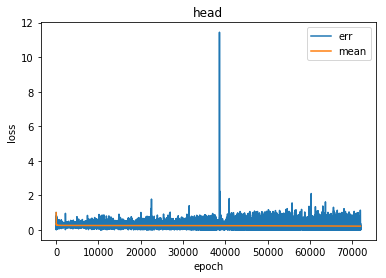

./additive-lstm-cdlc-loss-values-0.001-0.5-1-300-10.bin


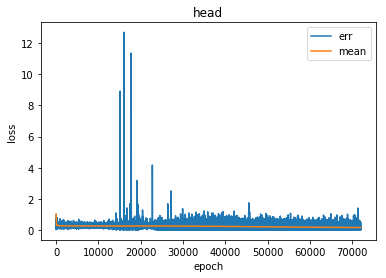

In [169]:
lrList = [1e-3]
momentumlist = [0.5]
maxEpochList = [300]
lstmDepthList = [10]
compList = ['tanh','additive']
size=0
for lr in lrList:
    for mmt in momentumlist:
        for maxEpoch in maxEpochList:
            for lstmDepth in lstmDepthList:
                for comp in compList:
                    lrStr  = ("%2.15f" % lr).rstrip('0')
                    mmStr  = ("%2.15f" % mmt).rstrip('0')
                    fname = ("./%s-lstm-cdlc-loss-values-%s-%s-1-%d-%d.bin" % (comp,lrStr,mmStr,maxEpoch,lstmDepth))
                    plotLossLSTM(fname,size)